证件照排版。

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

img = cv2.cvtColor(cv2.imread("./lyf.jpg"), cv2.COLOR_BGR2RGB)

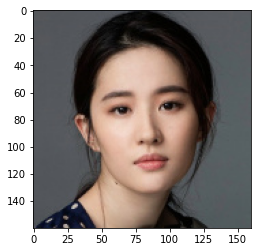

In [24]:
plt.imshow(img)
Size = namedtuple("Size", ["width", "height"])

In [60]:
# 排版证件照, 从左上角开始打印(去掉边框), 照片会被自动resize。
def id_photo_layout(img, photo_size, paper_size, paper_background, border_size=5):
    paper_image = np.zeros((paper_size.height, paper_size.width, 3), np.uint8)
    # fill color
    paper_image[:, :, 0] = paper_background[0] # blue
    paper_image[:, :, 1] = paper_background[1] # green
    paper_image[:, :, 2] = paper_background[2] # red
    
    photo_width = img.shape[0]
    photo_height = img.shape[1]
    # resize img
    img = cv2.resize(img, (photo_size.width, photo_size.height), interpolation = cv2.INTER_AREA)
    
    # top, left
    top, left = border_size, border_size
    while top + photo_height <= paper_size.height:
        left = border_size
        while left + photo_width <= paper_size.width:
            paper_image[top: (top + photo_height), left: (left + photo_width)] = img
            left+=photo_width + 5  # 加5像素的空隙
        top+=photo_height + 5 # 加5像素的空隙
    return paper_image

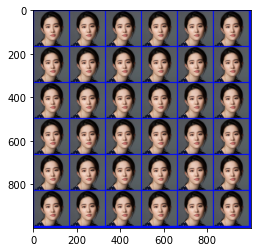

In [61]:
photo_size = Size(width=img.shape[0], height=img.shape[1])
paper_size = Size(width=1000, height=1000)

paper_image = id_photo_layout(img,photo_size, paper_size, [0, 10, 255])
plt.imshow(paper_image)

In [62]:
size_str='100x200'
Size(width=int(size_str.split('x')[0]), height=int(size_str.split('x')[1]))

Size(width=100, height=200)

In [35]:
photo_size

Size(width=160, height=160)

In [36]:
paper_size

Size(width=1000, height=1000)